# By: Abdulkodri Mubarak Damilola
GRIP: THE SPARKS FOUNDATION
Data Science and Business Analytics Internshipg
Task6: Prediction Using Decision Tree Algorithm


In [ ]:
#Import the require libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [116]:
df_data=pd.read_csv("iris.csv")
df_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [118]:
#Data exploratory
df_data.shape

(150, 6)

In [119]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [120]:
df_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [121]:
df_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

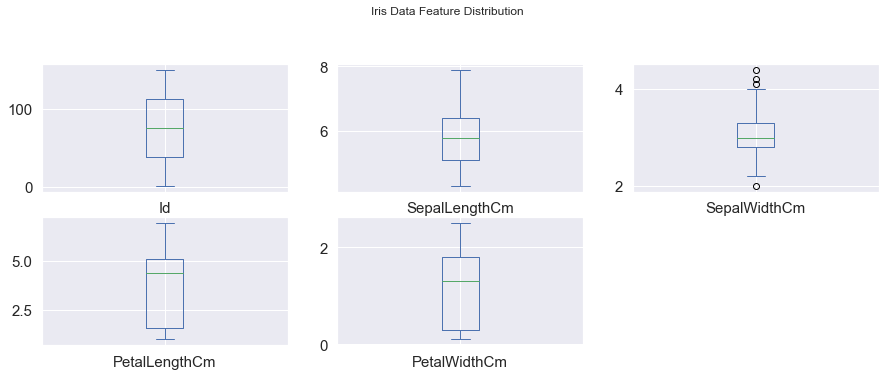

In [122]:
#Data Feature Distribution:
df_data.plot(kind = 'box', figsize = (15,8), subplots = True, layout = (3,3),  title = "Iris Data Feature Distribution", fontsize=15)
plt.show()

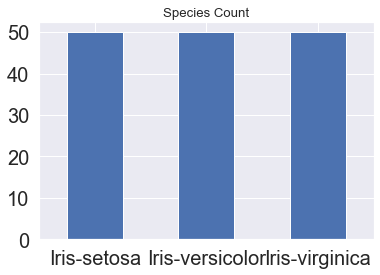

In [149]:
# Value counts of the different species:
df_data['Species'].value_counts().plot(kind='bar', rot=0, title = 'Species Count', fontsize=20)
plt.show()

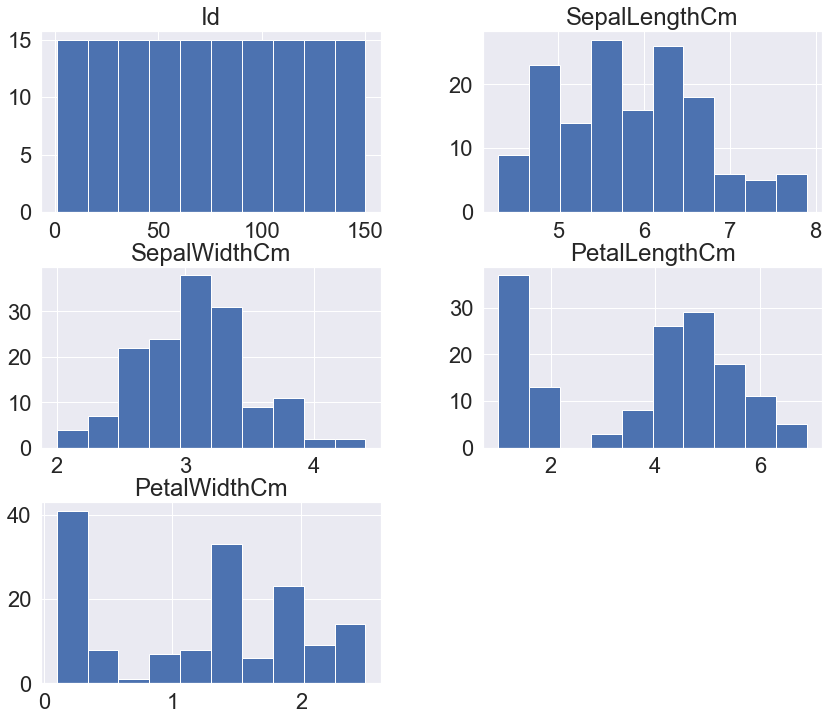

In [124]:
 #Data distribution for each column:
df_data.hist(figsize=(14,12))
plt.show()

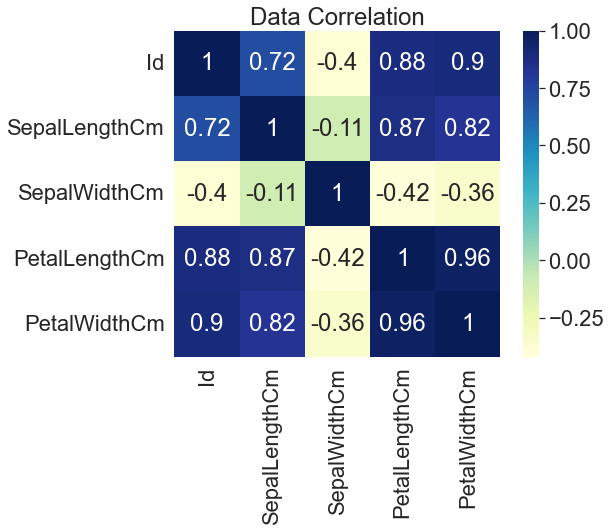

In [125]:
# Correlation between features:
fig, ax = plt.subplots(figsize=(8, 6));
sns.set(font_scale=2);

# Heatmap
sns.heatmap(df_data.corr(), cmap = "YlGnBu", annot= True, square = True).set(title='Data Correlation')
plt.show()

In [126]:
#Declare Features and Target
used_data=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
X=df_data[used_data]
y=df_data.Species

In [127]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [128]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [131]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [132]:
#Implimenting Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [133]:
#checking for overfitting
print(model.score(x_test,y_test))

1.0


In [134]:
print(model.score(x_train,y_train))

0.9523809523809523


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(502.20000000000005, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(418.5, 54.360000000000014, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(585.9, 54.360000000000014, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

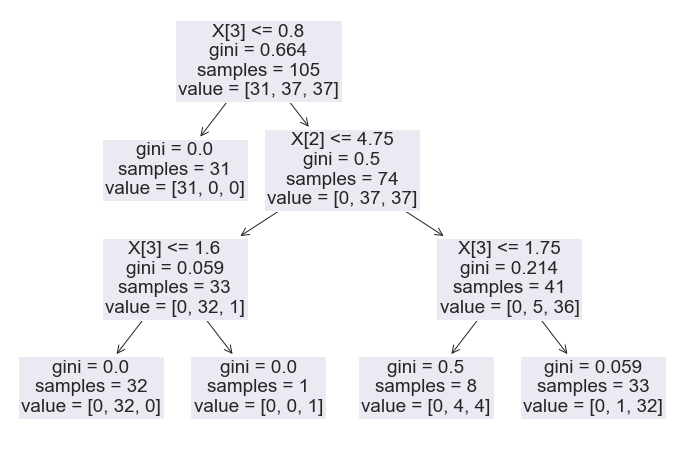

In [135]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(x_train,y_train))

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [148]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [136]:
from sklearn.tree import DecisionTreeClassifier
rodel=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
rodel.fit(x_train,y_train)
y_pre=rodel.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [137]:
print(rodel.score(x_train,y_train))

0.9523809523809523


In [138]:
print(model.score(x_test,y_test))

1.0


[Text(334.79999999999995, 570.7800000000001, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(223.2, 407.70000000000005, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(446.4, 407.70000000000005, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(223.2, 244.62, 'X[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(111.6, 81.53999999999996, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(334.79999999999995, 81.53999999999996, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(669.5999999999999, 244.62, 'X[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(558.0, 81.53999999999996, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(781.1999999999999, 81.53999999999996, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

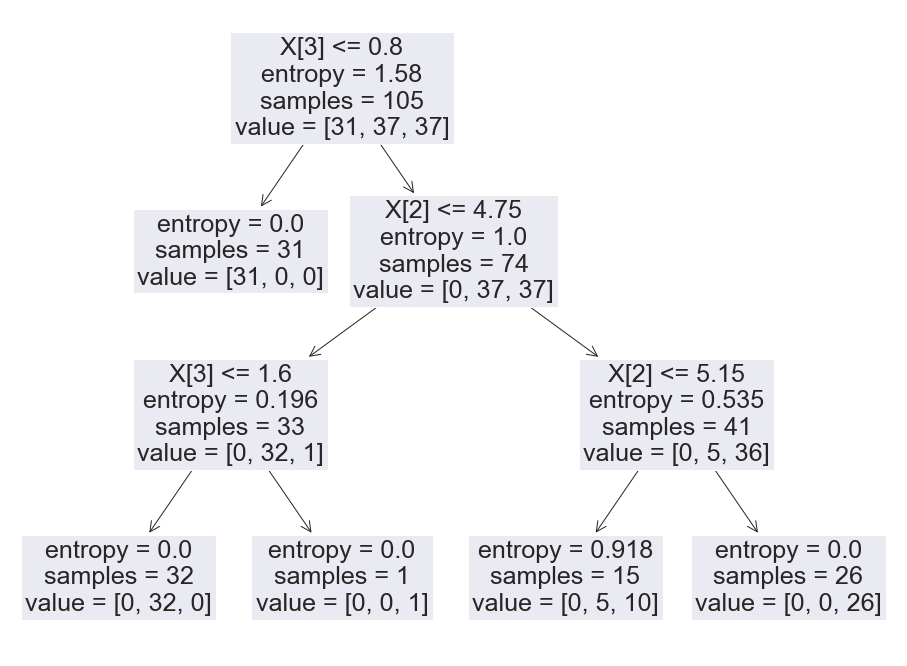

In [139]:
from sklearn import tree
plt.figure(figsize=(16,12))
tree.plot_tree(rodel.fit(x_train,y_train))

In [143]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [144]:
print(confusion_matrix(y_test,y_pre))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
